# Classifying Iris flowers

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plots
import warnings
warnings.filterwarnings('ignore')
plots.style.use('fivethirtyeight')

We will be classifying Iris flowers using k nearest neighbors. For more information about the dataset : https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
data = Table.read_table("Iris.csv")
data

sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Class
7,3.2,4.7,1.4,Iris-versicolor
6.4,3.2,4.5,1.5,Iris-versicolor
6.9,3.1,4.9,1.5,Iris-versicolor
5.5,2.3,5.5,1.7,Iris-versicolor
6.5,2.8,4.6,1.5,Iris-versicolor
5.7,2.8,4.5,1.3,Iris-versicolor
6.3,3.3,4.7,1.6,Iris-versicolor
4.9,2.4,3.3,1,Iris-versicolor
6.6,2.9,4.6,1.3,Iris-versicolor
5.2,2.7,3.9,1.4,Iris-versicolor


# Use a scatter plot to visualize data

In this lab, you will choose which two flower characteristics you want to use for your classifier. Use the .scatter() method to make a scattergram of the two fields you have chosen.

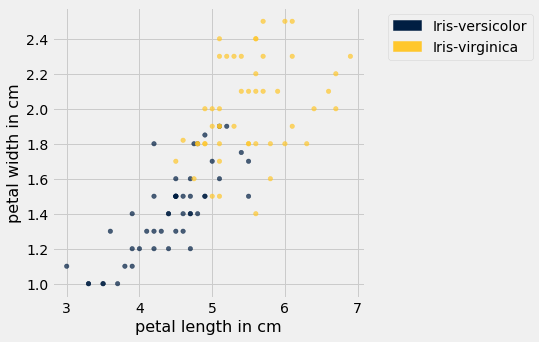

In [3]:
data.scatter(2,3, colors=4)

# Split the data into a training set and a testing set

When dealing with KNN classifiers, it is always a good idea to shuffle the values around to eliminate any bias in the order of the data inputs.

In [4]:
data = data.sample(with_replacement=False) #Shuffle

Here are a couple of useful functions that you may find useful. flower_num takes in a flower name and returns a number associated with it (In this case 'Iris-versicolor' will return 0 and 'Iris-virginica' will return 1). flower_name reverses what flower_num does by returning what flower is associated with that number. These functions are useful if you want to transform the table from holding flower names to numbers that represent their type. If you don't think this is useful, you should move on and come back if you change your mind

In [5]:
#####YOU MAY FIND THESE FUNCTIONS HELPFUL#####

#Assigns a number to the flower based on it's type
def flower_num(flower):
    if flower == "Iris-versicolor":
        return 0
    elif flower == "Iris-virginica":
        return 1
    else:
        print("Unknown flower")

#Reassigns the flower name based on its number
def flower_name(number):
    if number == 0:
        return "Iris-versicolor"
    elif number == 1:
        return "Iris-virginica"
    else:
        print("Unknown flower")

data["Class"] = data.apply(flower_num, "Class")

In order to build a classifier, you will need to split the data into a training set and a testing set. You may choose how to distribute the data, for example you may want to put 75 data points in the training set and 25 points in the testing set

In [6]:
train = data.take(np.arange(75)) #Make training set
test = data.take(np.arange(75, 100)) #Make test set

# Classify the data

It is recommended that you make a distance and predict function like you had in lab and apply it to your table. For this part of the lab you may choose the value of k (but remember to choose an odd number)

In [7]:
def distance(x, y):
    return np.sqrt(np.sum((x-y)**2,1))

def predict(input_table, to_predict, k):
    input_data = input_table.select(['petal length in cm','petal width in cm']).values
    dists = distance(to_predict, input_data)
    inds = np.argsort(dists)[0:k]
    most_common_response = np.argmax(np.bincount(input_table['Class'][inds]))
    return most_common_response

In [8]:
predictions = test.apply(lambda length, width: predict(train, [length, width], 3), [2,3])
test_with_predictions = test.with_column("Predictions", predictions)
test_with_predictions

sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Class,Predictions
6.4,3.2,5.3,2.3,1,1
5.7,2.8,4.5,1.3,0,0
7.2,3.2,6,1.8,1,1
7.3,2.9,6.3,1.8,1,1
6,3.4,4.5,1.6,0,0
6.3,2.3,4.75,1.8,0,1
6.3,2.5,5,1.9,1,0
5.6,2.9,3.6,1.3,0,0
5.5,2.4,3.7,1,0,0
6.2,3.4,5.4,2.3,1,1


# Compute the accuracy of your predictor 

Note that this is a very ideal data set of KNN, so it is possible to get 1 or something close to 1

In [9]:
accuracy = np.count_nonzero(test_with_predictions.column('Class') == test_with_predictions.column('Predictions')) / test.num_rows
accuracy

0.68

# Vary the value of K

Reclassify the data, but this time using k+2, k+4, and k+6 where k is the k-value you chose in the previous part. Calculate the accuracy for each of these choices of k. If you wish, you can calculate k-2. k-4, k-6 for this section instead. Since this dataset is ideal for KNN, there may be little difference in these values, but it is important for the homework that you understand how to this. 

In [10]:
predictions5 = test.apply(lambda length, width: predict(train, [length, width], 5), [2,3])
test_with_predictions5 = test.with_column("Predictions", predictions5)
accuracy5 = np.count_nonzero(test_with_predictions5.column('Class') == test_with_predictions5.column('Predictions')) / test.num_rows
accuracy5

0.8

In [11]:
predictions7 = test.apply(lambda length, width: predict(train, [length, width], 7), [2,3])
test_with_predictions7 = test.with_column("Predictions", predictions7)
accuracy7 = np.count_nonzero(test_with_predictions7.column('Class') == test_with_predictions7.column('Predictions')) / test.num_rows
accuracy7

0.84

In [12]:
predictions9 = test.apply(lambda length, width: predict(train, [length, width], 9), [2,3])
test_with_predictions9 = test.with_column("Predictions", predictions9)
accuracy9 = np.count_nonzero(test_with_predictions9.column('Class') == test_with_predictions9.column('Predictions')) / test.num_rows
accuracy9

0.88

# Plot the accuracies

Make a line plot of all the accuracies you calculated in the last couple sections

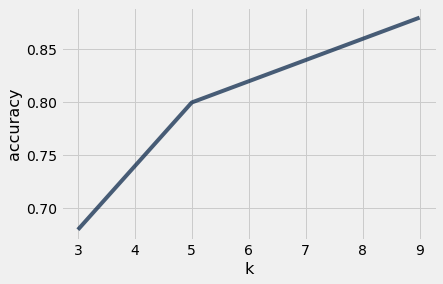

In [13]:
results = Table().with_columns("k", [3,5,7,9], "accuracy", [accuracy, accuracy5, accuracy7, accuracy9])
results.plot("k", "accuracy")

# Decision Boundary

Now we will visualize the decision boundary for your classifier. No work is required for this part of the lab, but you might find it interesting to see how different values of k changes the decision boundries. What pattern do you notice? Pick the value of k you wish to visualize by changing K_VAL below

In [14]:
K_VAL = 3

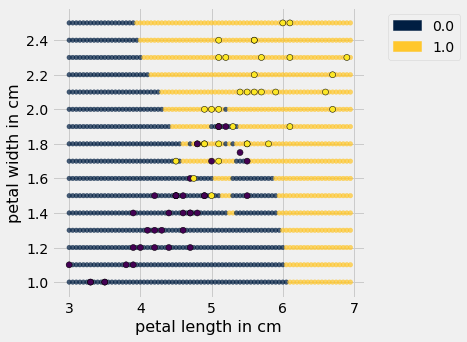

In [15]:
#Don't worry about this cell, just run it
x_array = make_array()
y_array = make_array()
for x in np.arange(3, 7, 0.05):
    for y in np.arange(1, 2.60, 0.1):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)
        
test_grid = Table().with_columns(
    'petal length in cm', x_array,
    'petal width in cm', y_array
)

def classify_grid(training, test):
    c = make_array()
    for i in range(test.num_rows):
        c = np.append(c, predict(training, make_array(test.row(i)), K_VAL))   
    return c

c = classify_grid(train, test_grid)

test_grid = test_grid.with_column('Class', c)
test_grid.scatter(0,1, colors = 2)
plt.scatter(train.column('petal length in cm'), train.column('petal width in cm'), c=train.column("Class"), edgecolor='black')